In [1]:
import numpy as np
import cv2
print(cv2.__version__)
from matplotlib import pyplot as plt

4.5.4


In [2]:
img = cv2.imread('examples/IMG_4.jpg')
img.shape

(809, 1057, 3)

In [3]:
def change_brightness(img, value=30):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    v = cv2.add(v,value)
    v[v > 255] = 255
    v[v < 0] = 0
    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img

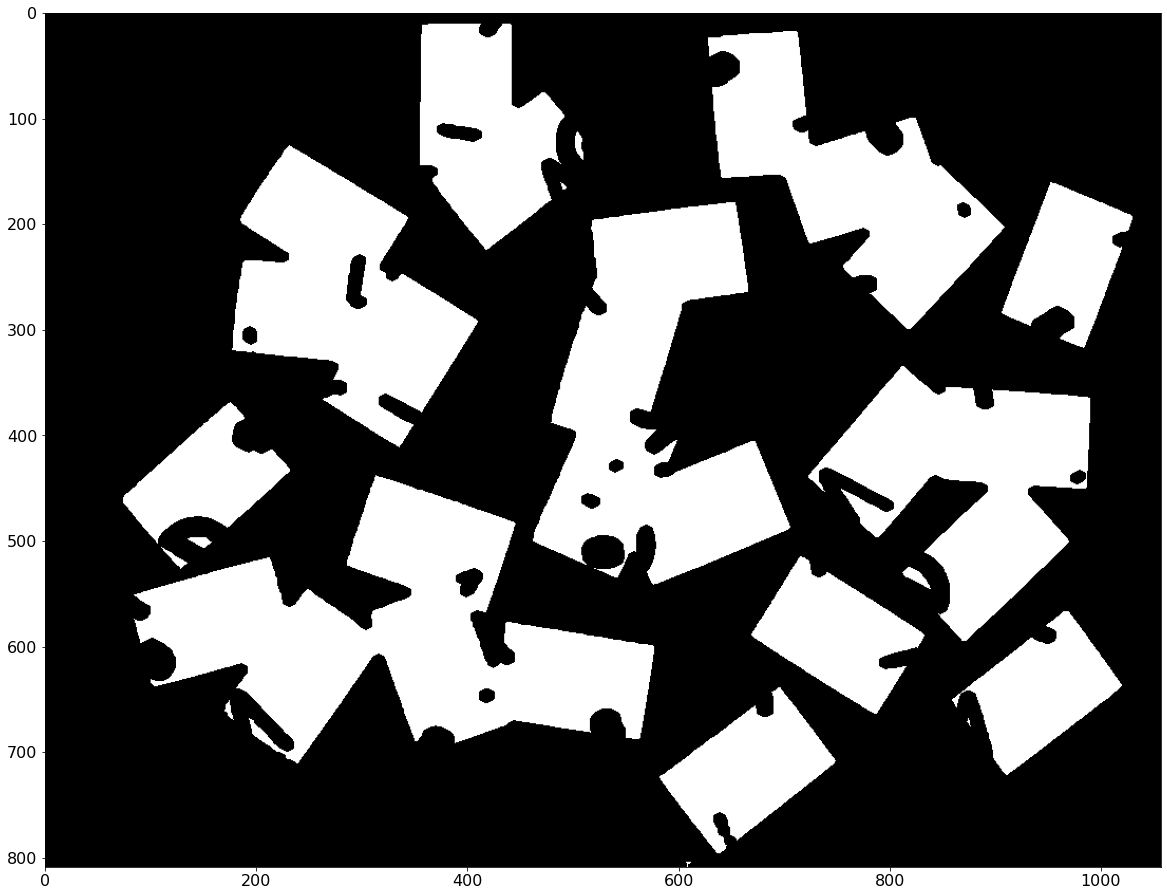

In [4]:
cart_mask = img[:,:,::-1]

cart_mask = change_brightness(cart_mask, value=255)
cart_mask = cart_mask[:,:,2] - cart_mask[:,:,0] / 2 - cart_mask[:,:,1] / 2
t, cart_mask = cv2.threshold(cart_mask, 60, 255, 0)

# cart_mask = cv2.cvtColor(cart_mask, cv2.COLOR_HSV2BGR)
# cart_mask, _, _ = cv2.split(cart_mask)
# print(cart_mask.min(), cart_mask.max())
# t = (cart_mask < 10) | (cart_mask > 30)
# cart_mask[t] = 0
# cart_mask[~t] = 255

for i in range(5):
    cart_mask = cv2.medianBlur(cart_mask.astype(np.float32), 3)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
cart_mask = cv2.morphologyEx(
    cart_mask, cv2.MORPH_CLOSE, kernel, iterations=0
)
cart_mask = cv2.erode(cart_mask, kernel, iterations=2)


font = {'size': 16}
plt.rc('font', **font)
fig = plt.figure(figsize=(20, 20))
plt.imshow(cart_mask, cmap='gist_gray')

In [5]:
def sobel_filter(img):
    hkernel = np.array(
        [[-1, 0, 1], 
         [-2, 0, 2], 
         [-1, 0, 1]]
    )
    vkernel = np.array(
        [[-1,-2,-1], 
         [ 0, 0, 0], 
         [ 1, 2, 1]]
    )
    
    hsobel = cv2.filter2D(img, -1, hkernel)
    vsobel = cv2.filter2D(img, -1, vkernel)
    
    return hsobel / 2 + vsobel / 2

In [6]:
def laplas_filter(img):
    kernel = np.array(
        [[ 0, 1, 0], 
         [ 1,-4, 1], 
         [ 0, 1, 0]]
    )
    
    laplas = cv2.filter2D(img, -1, kernel)
    
    return laplas

In [7]:
def prewitt_filter3x3(img):
    hkernel = np.array(
        [[-1, 0, 1], 
         [-1, 0, 1], 
         [-1, 0, 1]]
    )
    vkernel = np.array(
        [[-1,-1,-1], 
         [ 0, 0, 0], 
         [ 1, 1, 1]]
    )
    
    hprewitt = cv2.filter2D(img, -1, hkernel)
    vprewitt = cv2.filter2D(img, -1, vkernel)
    
    return hprewitt / 2 + vprewitt / 2

In [8]:
def prewitt_filter4x4(img):
    hkernel = np.array(
        [[-3,-1, 1, 3], 
         [-3,-1, 1, 3], 
         [-3,-1, 1, 3],
         [-3,-1, 1, 3]]
    )
    vkernel = np.array(
        [[ 3, 3, 3, 3], 
         [ 1, 1, 1, 1], 
         [-1,-1,-1,-1],
         [-3,-3,-3,-3]]
    )
    
    hprewitt = cv2.filter2D(img, -1, hkernel)
    vprewitt = cv2.filter2D(img, -1, vkernel)
    
    return hprewitt / 2 + vprewitt / 2

In [9]:
def kirsch_filter(img):
    kernels = [0] * 8
    kernels[0] = np.array(
        [[ 5, 5, 5], 
         [-3, 0,-3], 
         [-3,-3,-3]]
    )
    kernels[1] = np.array(
        [[-3, 5, 5], 
         [-3, 0, 5], 
         [-3,-3,-3]]
    )
    kernels[2] = np.array(
        [[-3,-3, 5], 
         [-3, 0, 5], 
         [-3,-3, 5]]
    )
    kernels[3] = np.array(
        [[-3,-3,-3], 
         [-3, 0, 5], 
         [-3, 5, 5]]
    )
    kernels[4] = np.array(
        [[-3,-3,-3], 
         [-3, 0,-3], 
         [ 5, 5, 5]]
    )
    kernels[5] = np.array(
        [[-3,-3,-3], 
         [ 5, 0,-3], 
         [ 5, 5,-3]]
    )
    kernels[6] = np.array(
        [[ 5,-3,-3], 
         [ 5, 0,-3], 
         [ 5,-3,-3]]
    )
    kernels[7] = np.array(
        [[ 5, 5,-3], 
         [ 5, 0,-3], 
         [-3,-3,-3]]
    )
    
    kirsch = cv2.filter2D(img, -1, kernels[0]) / 8
    for i in range(1, 8):
        kirsch += cv2.filter2D(img, -1, kernels[i]) / 8
    
    return kirsch

In [10]:
hsv = cv2.cvtColor(img[:,:,::-1], cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)

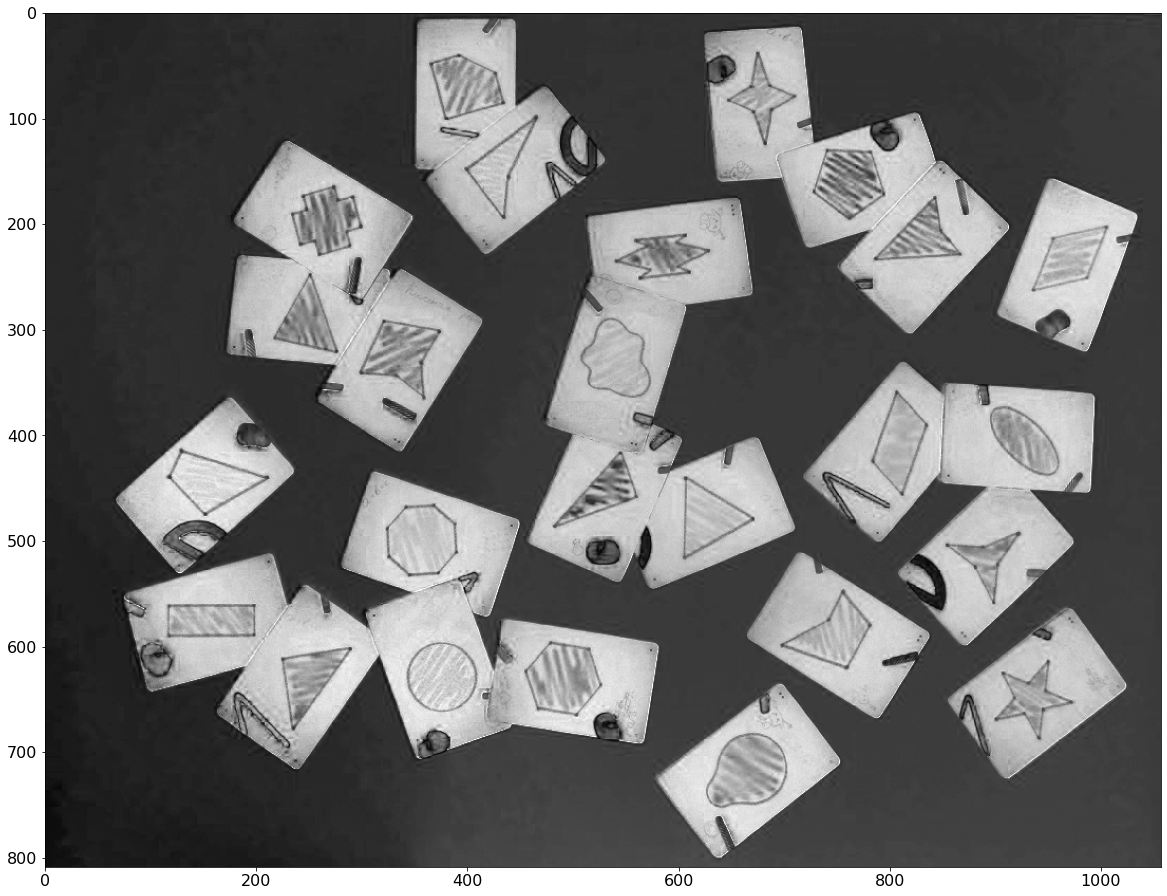

In [11]:
font = {'size': 16}
plt.rc('font', **font)
fig = plt.figure(figsize=(20, 20))
plt.imshow(s, cmap='gist_gray')

In [12]:
mask = v

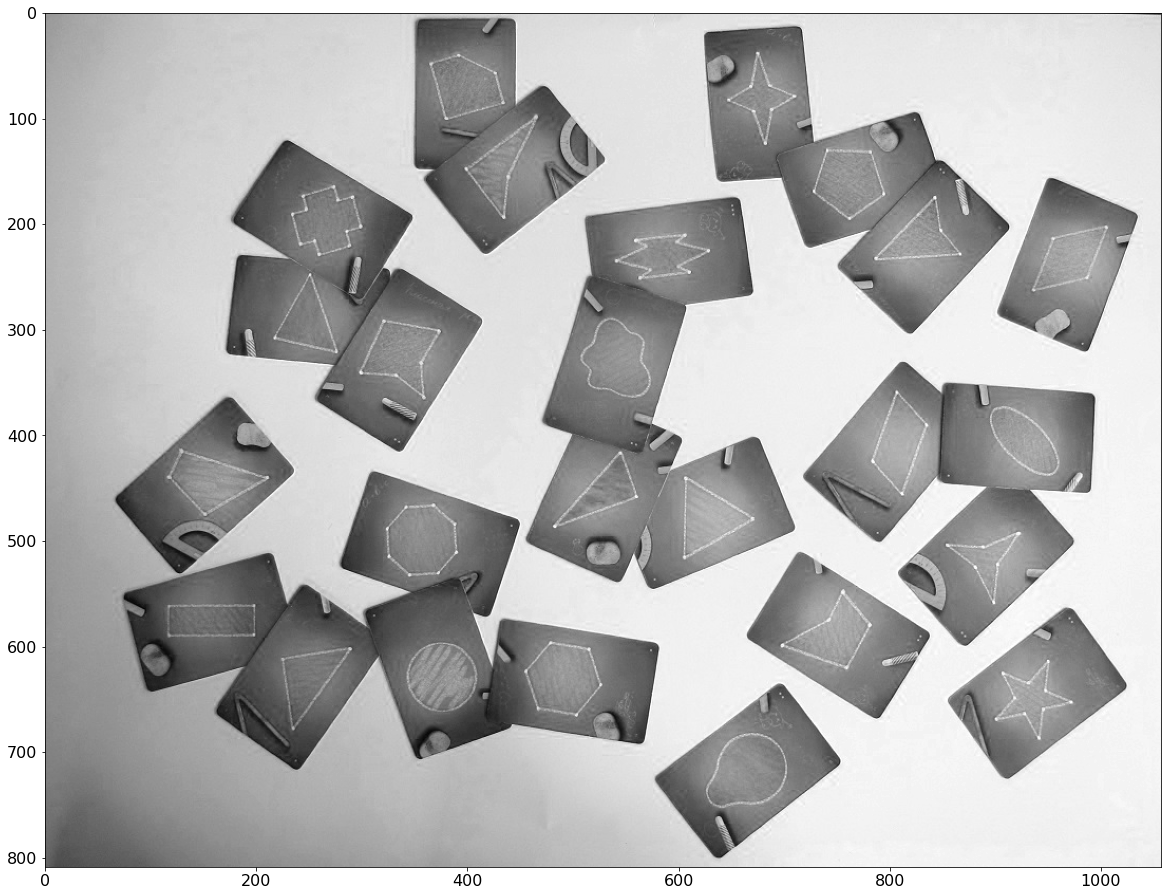

In [13]:
font = {'size': 16}
plt.rc('font', **font)
fig = plt.figure(figsize=(20, 20))
plt.imshow(mask, cmap='gist_gray')

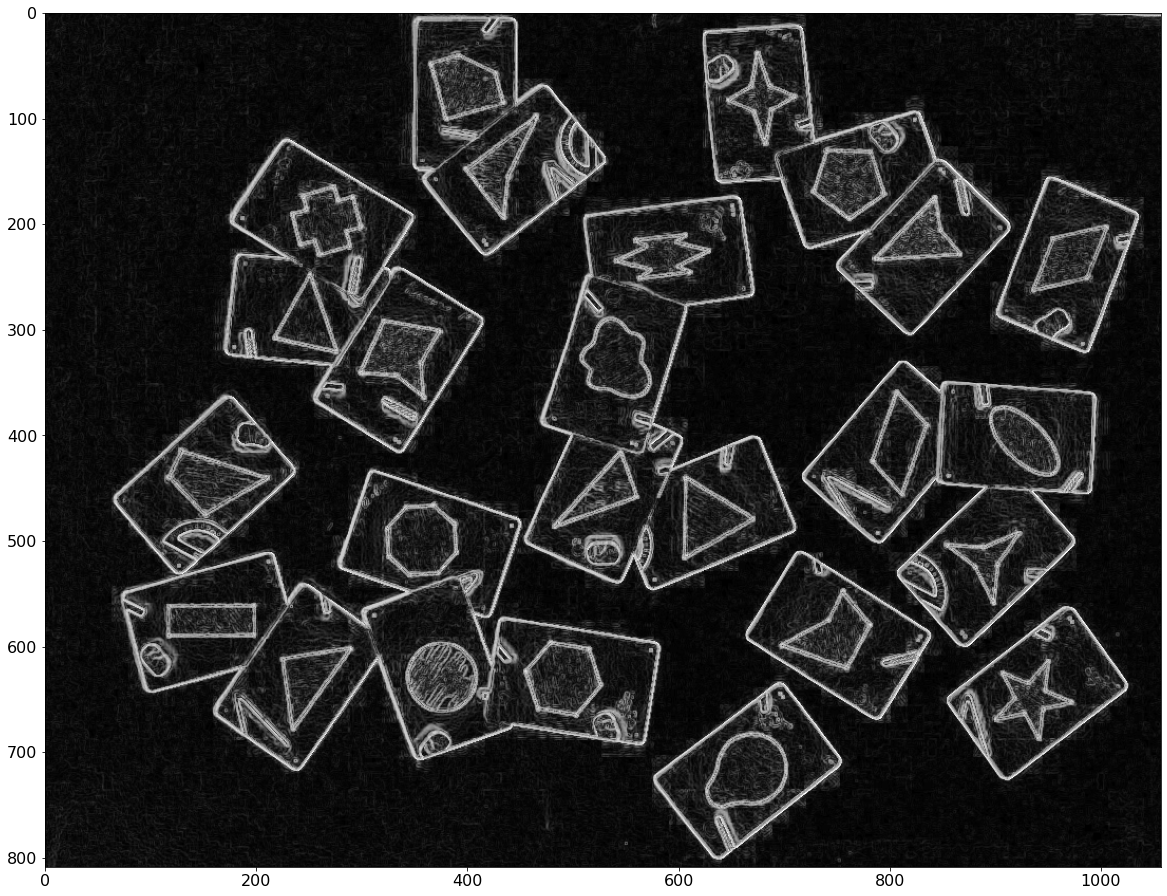

In [14]:
mask1 = np.array(mask)
filter_ = kirsch_filter

borders_mask = filter_(mask1)
for i in range(0):
    mask1 = mask1 / 2 + borders_mask / 2
    borders_mask = filter_(mask1)

font = {'size': 16}
plt.rc('font', **font)
fig = plt.figure(figsize=(20, 20))
plt.imshow(borders_mask, cmap='gist_gray')

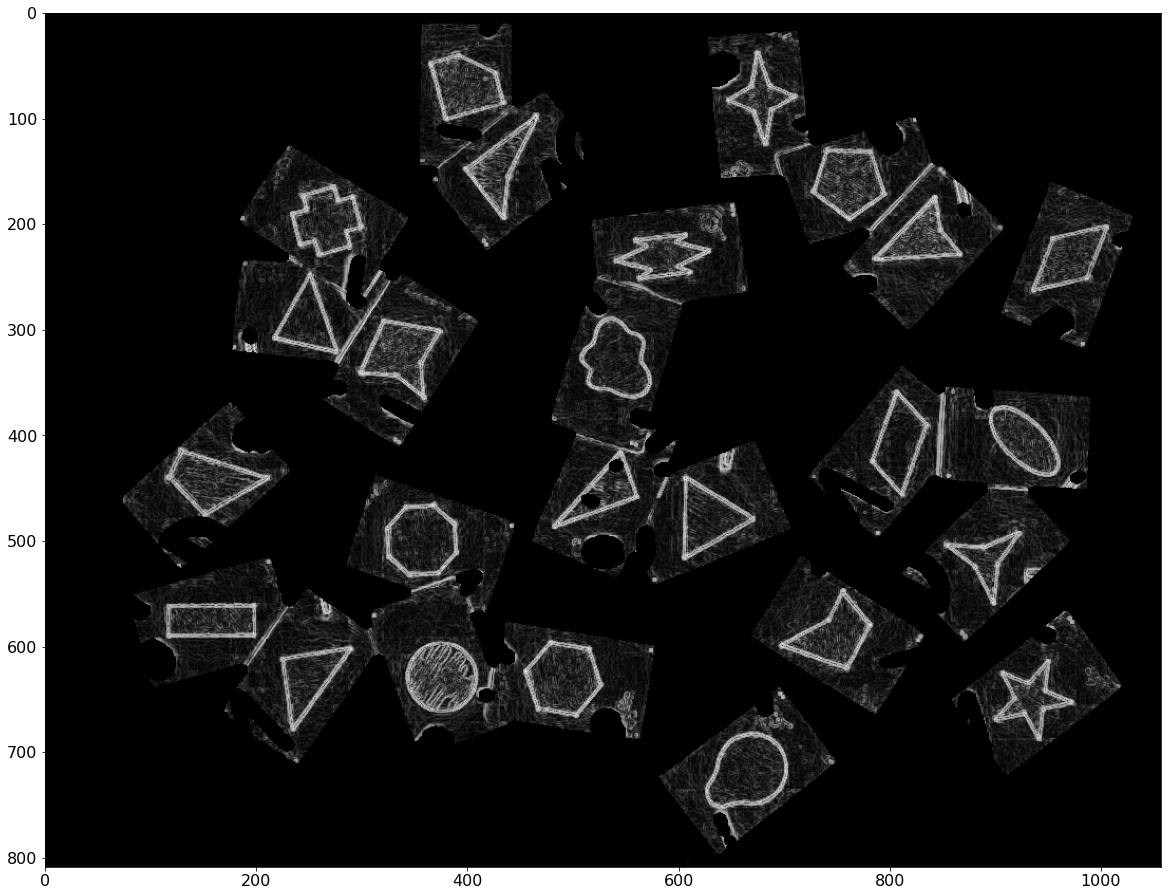

In [15]:
a = cart_mask * borders_mask / 255

font = {'size': 16}
plt.rc('font', **font)
fig = plt.figure(figsize=(20, 20))
plt.imshow(a, cmap='gist_gray')

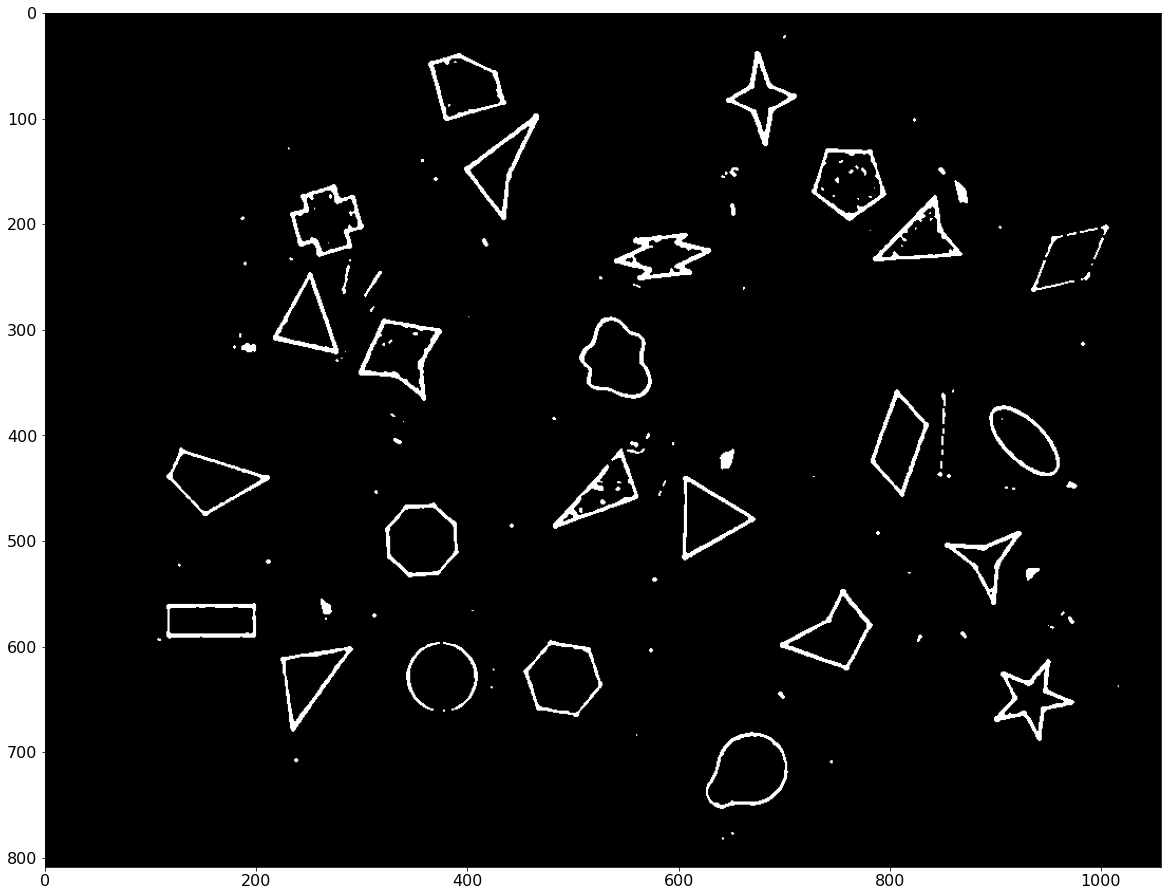

In [32]:
counters = (255 - s) * a / 255
counters = cv2.GaussianBlur(counters, (3, 3), 0)
t, counters = cv2.threshold(counters, 25, 255, 0)
for i in range(1):
    counters = cv2.medianBlur(counters.astype(np.uint8), 3)
# counters = cv2.erode(counters, np.ones((2, 2), 'uint8'), iterations=1)

font = {'size': 16}
plt.rc('font', **font)
fig = plt.figure(figsize=(20, 20))
plt.imshow(counters, cmap='gist_gray')

In [33]:
q1, q2 = cv2.findContours(
    counters, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE
)

In [34]:
q1

(array([[[641, 781]],
 
        [[641, 782]],
 
        [[642, 782]],
 
        [[642, 781]]], dtype=int32),
 array([[[650, 776]],
 
        [[650, 777]],
 
        [[651, 778]],
 
        [[652, 777]],
 
        [[651, 776]]], dtype=int32),
 array([[[744, 708]],
 
        [[743, 709]],
 
        [[744, 710]],
 
        [[745, 710]],
 
        [[745, 709]],
 
        [[745, 708]]], dtype=int32),
 array([[[237, 706]],
 
        [[236, 707]],
 
        [[236, 708]],
 
        [[237, 709]],
 
        [[238, 709]],
 
        [[239, 708]],
 
        [[239, 707]],
 
        [[238, 706]]], dtype=int32),
 array([[[560, 683]],
 
        [[560, 684]]], dtype=int32),
 array([[[668, 681]],
 
        [[667, 682]],
 
        [[666, 682]],
 
        [[665, 682]],
 
        [[664, 682]],
 
        [[663, 682]],
 
        [[662, 683]],
 
        [[661, 683]],
 
        [[660, 683]],
 
        [[659, 683]],
 
        [[658, 683]],
 
        [[657, 684]],
 
        [[656, 684]],
 
        [[655, 685]],
 

(array([91.,  6.,  0.,  1.,  3., 14.,  7.,  0.,  0.,  1.]),
 array([  1. ,  37.5,  74. , 110.5, 147. , 183.5, 220. , 256.5, 293. ,
        329.5, 366. ]),
 <BarContainer object of 10 artists>)

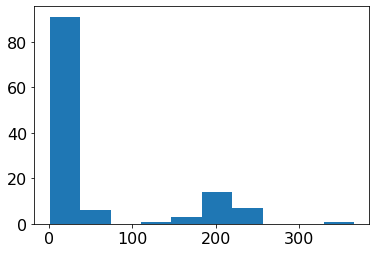

In [35]:
counters_lens = []
for e in q1:
    counters_lens.append(len(e))
counters_lens = np.array(counters_lens)
plt.hist(counters_lens)

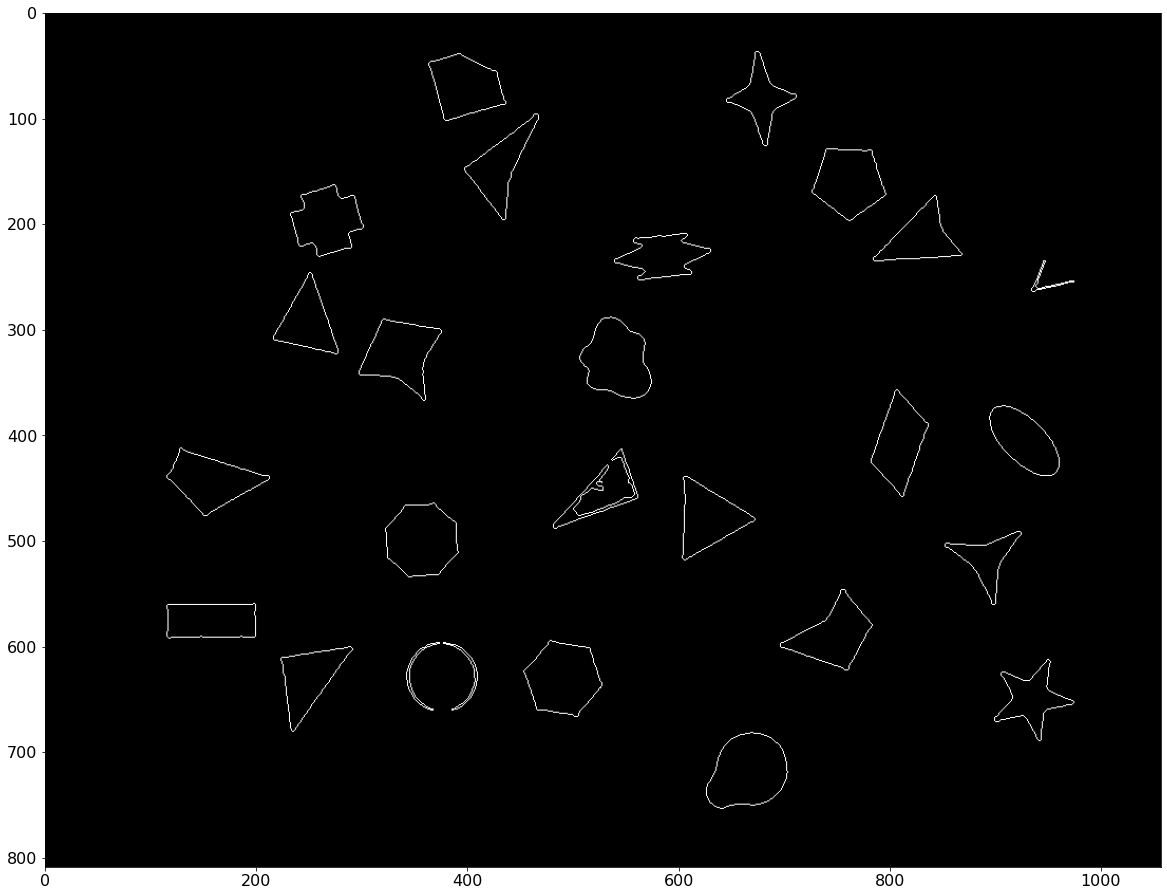

In [37]:
r = np.zeros(counters.shape)
for e1 in q1:
    if len(e1) < 100:
        continue
    for e2 in e1:
        e2 = e2.reshape(-1)
        r[e2[1], e2[0]] = 255
        
font = {'size': 16}
plt.rc('font', **font)
fig = plt.figure(figsize=(20, 20))
plt.imshow(r, cmap='gist_gray')

In [59]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
r1 = np.array(r)
r1 = cv2.morphologyEx(
    r1, cv2.MORPH_CLOSE, kernel, iterations=0
)
r1 = cv2.dilate(r1, kernel, iterations=2)
r1 = cv2.morphologyEx(
    r1, cv2.MORPH_CLOSE, kernel, iterations=2
)

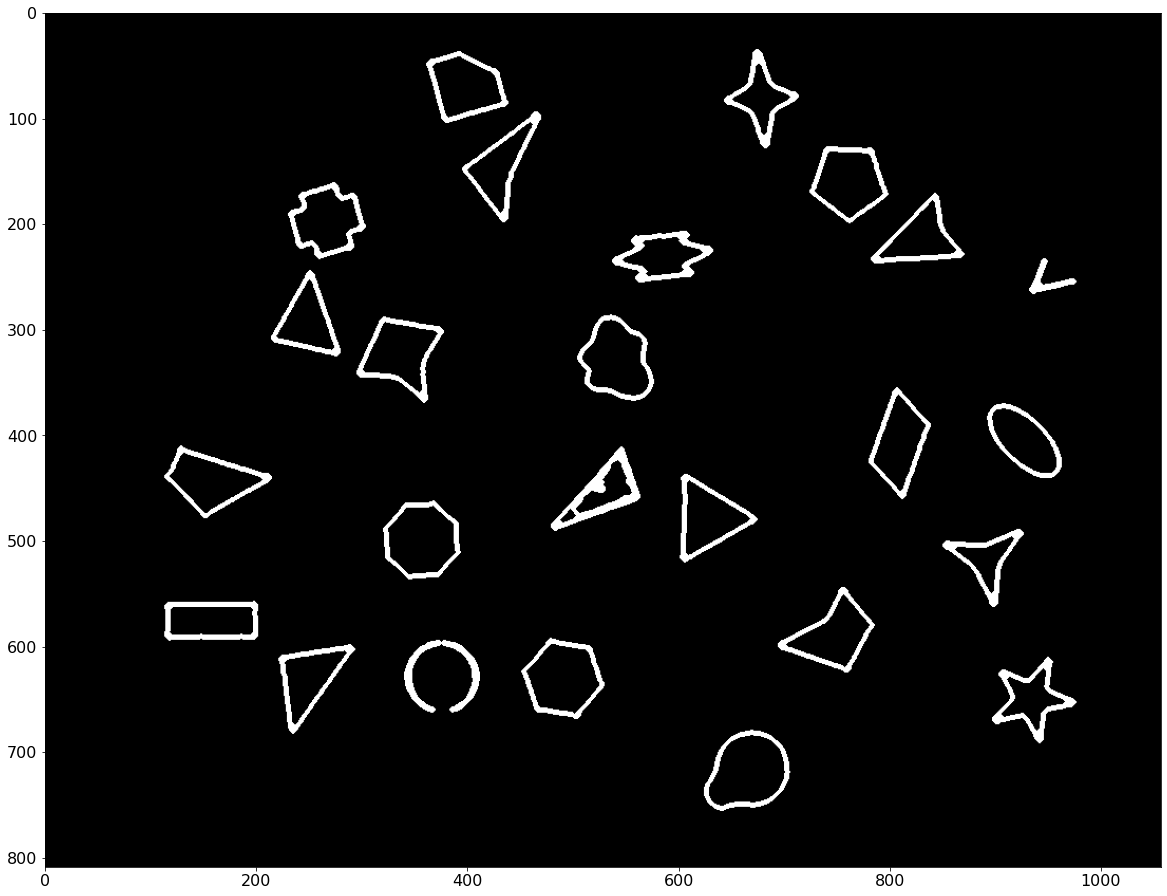

In [60]:
font = {'size': 16}
plt.rc('font', **font)
fig = plt.figure(figsize=(20, 20))
plt.imshow(r1, cmap='gist_gray')

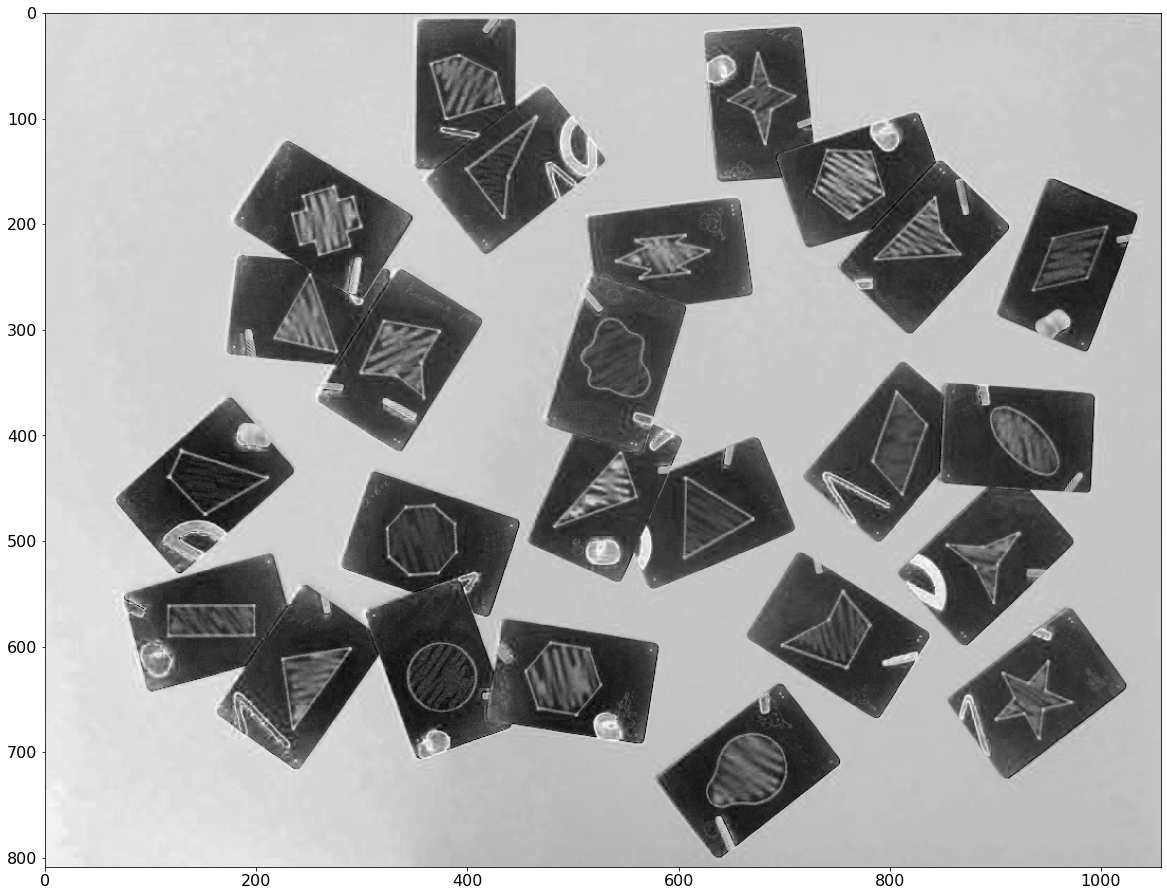

In [21]:
font = {'size': 16}
plt.rc('font', **font)
fig = plt.figure(figsize=(20, 20))
plt.imshow(255 - s, cmap='gist_gray')

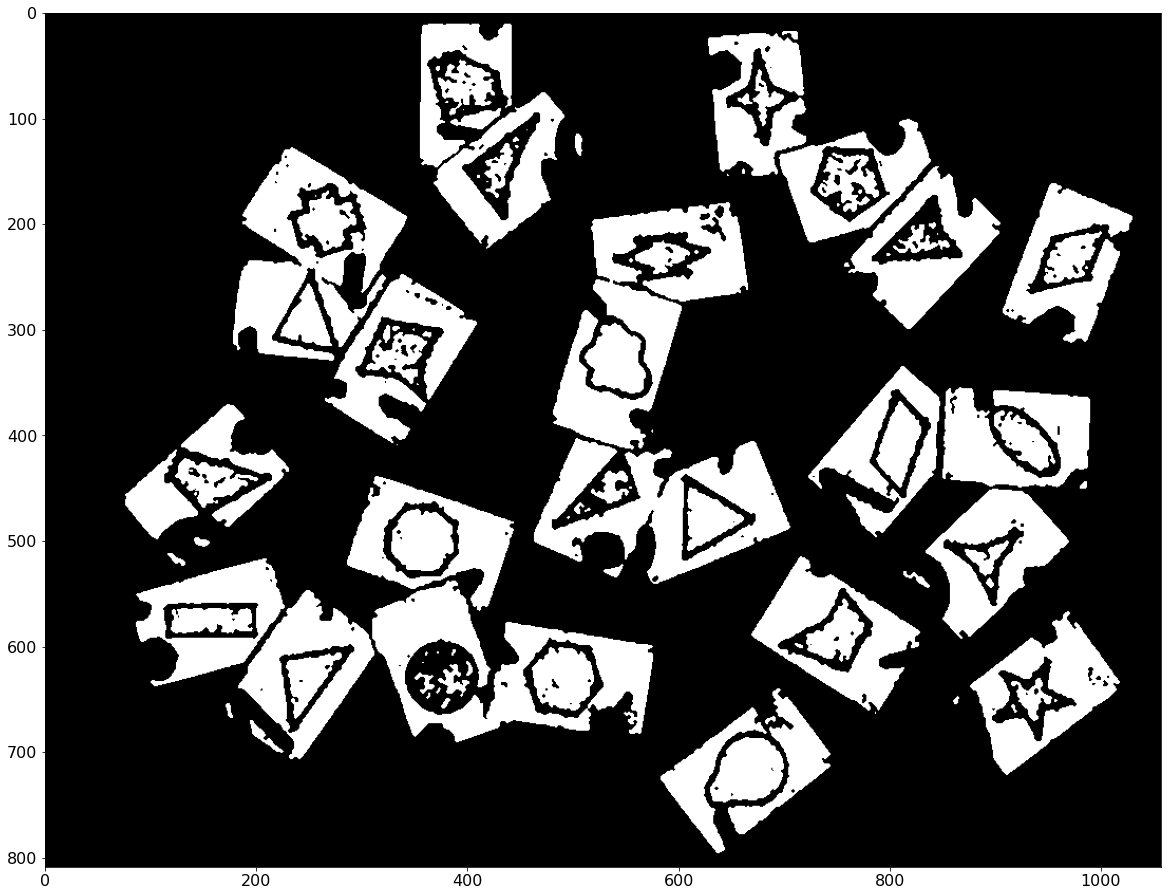

In [22]:
b = cart_mask - borders_mask

# e_cart_mask = cv2.erode(cart_mask, np.ones((3, 3), 'uint8'), iterations=10)
# b += e_cart_mask

# b = cv2.GaussianBlur(b, (3, 3), 0)
t, b = cv2.threshold(b, 220, 255, 0)
for i in range(3):
    b = cv2.medianBlur(b.astype(np.uint8), 3)

font = {'size': 16}
plt.rc('font', **font)
fig = plt.figure(figsize=(20, 20))
plt.imshow(b, cmap='gist_gray')

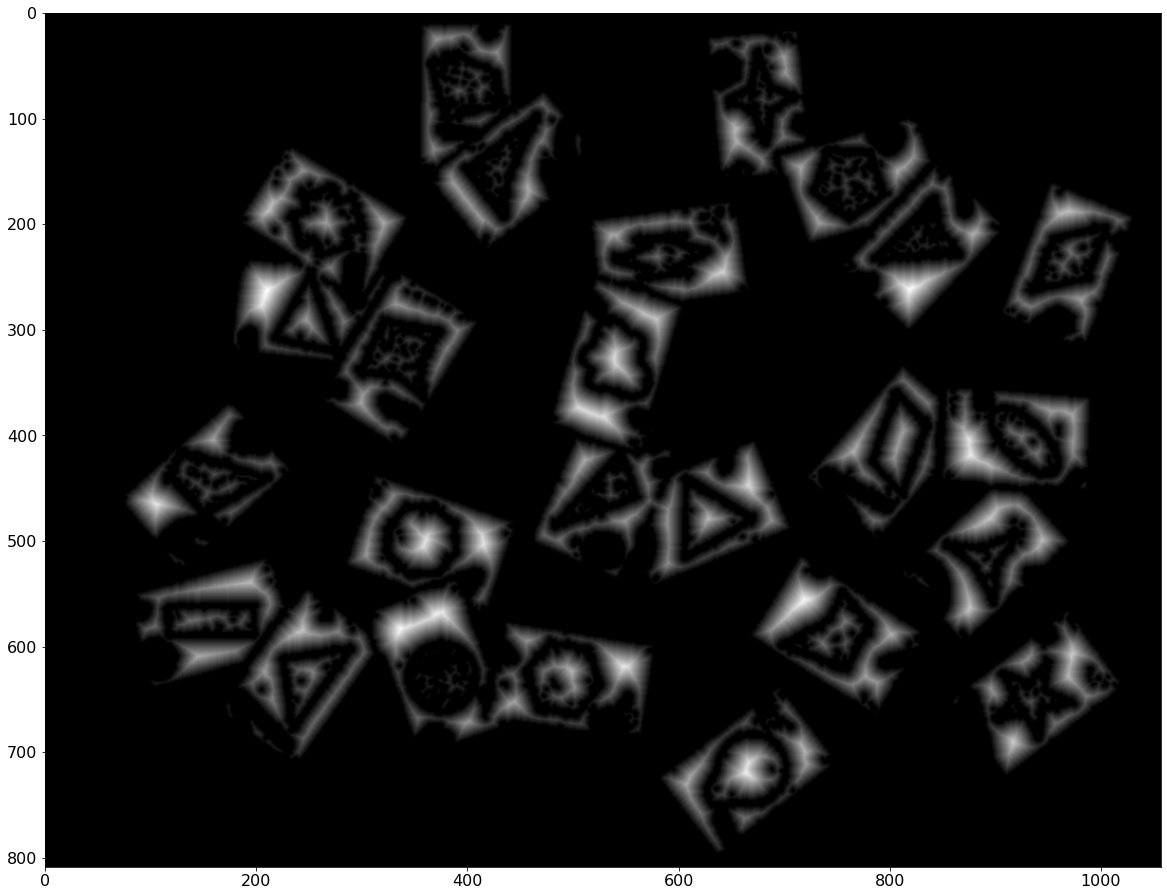

In [23]:
dist = cv2.distanceTransform(b, cv2.DIST_L2, 3)
cv2.normalize(dist, dist, 0, 1.0, cv2.NORM_MINMAX)

font = {'size': 16}
plt.rc('font', **font)
fig = plt.figure(figsize=(20, 20))
plt.imshow(dist, cmap='gist_gray')

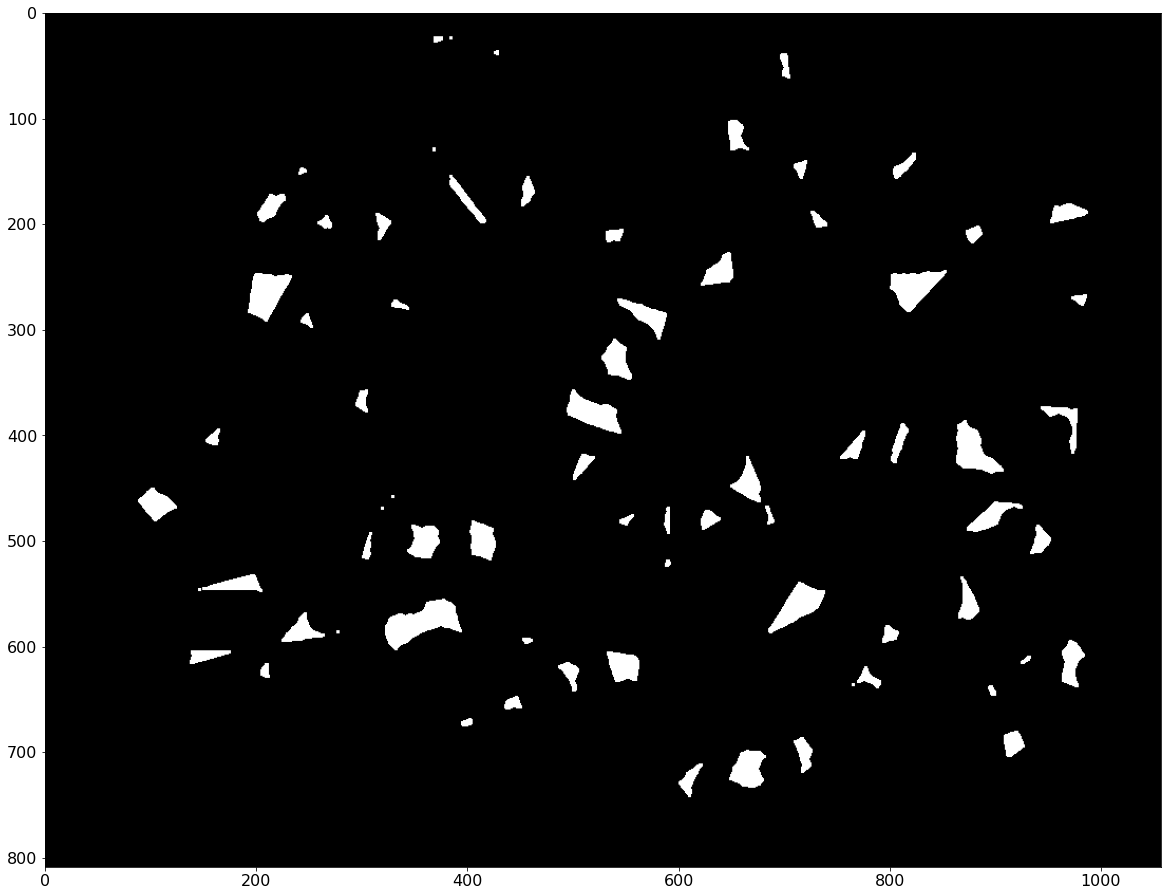

In [24]:
_, dist1 = cv2.threshold(dist, 0.5, 1.0, cv2.THRESH_BINARY)

kernel1 = np.ones((3,3), dtype=np.uint8)
dist1 = cv2.dilate(dist1, kernel1)

font = {'size': 16}
plt.rc('font', **font)
fig = plt.figure(figsize=(20, 20))
plt.imshow(dist1, cmap='gist_gray')